In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import statsmodels.api as sm


In [45]:
#load data set
df_co2 = pd.read_csv('/content/carbon_emmission.csv')
df_co2

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86
...,...,...,...,...
1565,1566,World,2023M11,0.72
1566,1567,World,2023M12,421.86
1567,1568,World,2023M12,0.68
1568,1569,World,2024M01,0.68


In [46]:
df_co2.isnull().sum()

,0
ObjectId,0
Country,0
Date,0
Value,0


In [47]:
df_temp = pd.read_csv('/content/temperature.csv')
df_temp

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,0.632,0.576,0.333,0.819,-0.337,0.284,...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,0.211,0.038,0.168,-0.246,-0.223,0.201,...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,0.029,-0.009,0.169,-0.251,-0.623,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [48]:
df_temp.isnull().sum()

,0
ObjectId,0
Country,0
ISO2,2
ISO3,0
F1961,37
...,...
F2018,12
F2019,12
F2020,13
F2021,12


In [58]:
#check info
df_co2.describe().T

,count,mean,std,min,25%,50%,75%,max
ObjectId,1570.0,785.500000,453.364276,1.0,393.25,785.500,1177.7500,1570.0
Value,1570.0,180.716153,180.554706,-0.1,0.45,313.835,355.0725,424.0


In [57]:
df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
ObjectId,225.0,113.000000,65.096083,1.000,57.00000,113.0000,169.00000,225.000
F1961,188.0,0.163053,0.405080,-0.694,-0.09700,0.0645,0.31850,1.892
F1962,189.0,-0.013476,0.341812,-0.908,-0.16400,-0.0560,0.11400,0.998
F1963,188.0,-0.006043,0.387348,-1.270,-0.20550,-0.0030,0.23050,1.202
F1964,188.0,-0.070059,0.309305,-0.877,-0.23650,-0.0560,0.13250,1.097
...,...,...,...,...,...,...,...,...
F2018,213.0,1.302113,0.596786,0.238,0.86500,1.1250,1.83400,2.772
F2019,213.0,1.443061,0.467510,0.050,1.16900,1.4120,1.69800,2.689
F2020,212.0,1.552038,0.621930,0.229,1.16175,1.4770,1.82625,3.691
F2021,213.0,1.343531,0.484692,-0.425,1.01900,1.3270,1.62900,2.676


#Clean data

In [ ]:
# Melt the dataframe from wide to long
df_temp_melted = df_temp.melt(
    id_vars=['Country', 'ISO2', 'ISO3'],
    value_vars=[col for col in df_temp.columns if col.startswith('F')],
    var_name='Year',
    value_name='Temperature'
)

In [ ]:
df_temp_melted

,Country,ISO2,ISO3,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,AFG,F1961,-0.113
1,Albania,AL,ALB,F1961,0.627
2,Algeria,DZ,DZA,F1961,0.164
3,American Samoa,AS,ASM,F1961,0.079
4,"Andorra, Principality of",AD,AND,F1961,0.736
...,...,...,...,...,...
13945,Western Sahara,EH,ESH,F2022,1.970
13946,World,NaN,WLD,F2022,1.394
13947,"Yemen, Rep. of",YE,YEM,F2022,NaN
13948,Zambia,ZM,ZMB,F2022,0.686


In [ ]:
# Remove 'F' from Year and convert to integer
df_temp_melted['Year'] = df_temp_melted['Year'].str.replace('F', '').astype(int)

In [ ]:
#check df_temp
df_temp_melted

,Country,ISO2,ISO3,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,AFG,1961,-0.113
1,Albania,AL,ALB,1961,0.627
2,Algeria,DZ,DZA,1961,0.164
3,American Samoa,AS,ASM,1961,0.079
4,"Andorra, Principality of",AD,AND,1961,0.736
...,...,...,...,...,...
13945,Western Sahara,EH,ESH,2022,1.970
13946,World,NaN,WLD,2022,1.394
13947,"Yemen, Rep. of",YE,YEM,2022,NaN
13948,Zambia,ZM,ZMB,2022,0.686


In [ ]:
#we have remove F from Year

In [ ]:
# Filter only 'World' for global trend
df_temp_world = df_temp_melted[df_temp_melted['Country'] == 'World'].copy()

In [ ]:
df_co2

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86
...,...,...,...,...
1565,1566,World,2023M11,0.72
1566,1567,World,2023M12,421.86
1567,1568,World,2023M12,0.68
1568,1569,World,2024M01,0.68


In [ ]:
#Clean & Transform df_co2
# Convert 'Date' to datetime format (YYYY-MM)
df_co2['Date'] = pd.to_datetime(df_co2['Date'].str.replace('M', '-'), format='%Y-%m')

In [ ]:
df_co2

,ObjectId,Country,Date,Value
0,1,World,1958-03-01,315.70
1,2,World,1958-04-01,317.45
2,3,World,1958-05-01,317.51
3,4,World,1958-06-01,317.24
4,5,World,1958-07-01,315.86
...,...,...,...,...
1565,1566,World,2023-11-01,0.72
1566,1567,World,2023-12-01,421.86
1567,1568,World,2023-12-01,0.68
1568,1569,World,2024-01-01,0.68


In [ ]:
# Extract year
df_co2['Year'] = df_co2['Date'].dt.year

In [ ]:
# Group by year and calculate average CO2 (ppm)
df_co2_yearly = df_co2.groupby('Year')['Value'].mean().reset_index()
df_co2_yearly.rename(columns={'Value': 'Avg_CO2_ppm'}, inplace=True)

In [ ]:
df_temp_melted

,Country,ISO2,ISO3,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,AFG,1961,-0.113
1,Albania,AL,ALB,1961,0.627
2,Algeria,DZ,DZA,1961,0.164
3,American Samoa,AS,ASM,1961,0.079
4,"Andorra, Principality of",AD,AND,1961,0.736
...,...,...,...,...,...
13945,Western Sahara,EH,ESH,2022,1.970
13946,World,NaN,WLD,2022,1.394
13947,"Yemen, Rep. of",YE,YEM,2022,NaN
13948,Zambia,ZM,ZMB,2022,0.686


In [ ]:
df_temp_melted.isnull().sum()

,0
Country,0
ISO2,124
ISO3,0
Year,0
Temperature,1490


In [ ]:
df_temp_melted.drop(columns=['ISO2'], inplace=True)

In [ ]:
df_temp_melted['Temperature'] = df_temp_melted.groupby('Country')['Temperature'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df_temp_melted.isnull().sum()

,0
Country,0
ISO3,0
Year,0
Temperature,0


In [ ]:
df_temp_world

,Country,ISO2,ISO3,Year,Temperature
221,World,NaN,WLD,1961,0.211
446,World,NaN,WLD,1962,0.038
671,World,NaN,WLD,1963,0.168
896,World,NaN,WLD,1964,-0.246
1121,World,NaN,WLD,1965,-0.223
...,...,...,...,...,...
13046,World,NaN,WLD,2018,1.290
13271,World,NaN,WLD,2019,1.444
13496,World,NaN,WLD,2020,1.711
13721,World,NaN,WLD,2021,1.447


In [ ]:
df_temp_world.drop(columns=['ISO2','ISO3'], inplace=True)

In [ ]:
df_co2_yearly

,Year,Avg_CO2_ppm
0,1958,315.232000
1,1959,172.460455
2,1960,158.601667
3,1961,158.938333
4,1962,159.355000
...,...,...
62,2020,207.416667
63,2021,208.472083
64,2022,209.518333
65,2023,210.844167


In [60]:
#cehck for null in df_co2_yearly
df_co2_yearly.isnull().sum()

,0
Year,0
Avg_CO2_ppm,0


In [63]:
#cehck for null in df_temp_world
df_temp_world.isnull().sum()

df_temp_world.columns

Index(['Country', 'Year', 'Temperature', 'Period'], dtype='object')

In [64]:
#downlaod df_co2_yearly final data as csv
df_co2_yearly.to_csv('df_co2_yearly.csv', index=False)
df_co2_yearly.columns

Index(['Year', 'Avg_CO2_ppm'], dtype='object')

In [65]:
#download data as csv
df_temp_melted.to_csv('df_temp_melted.csv', index=False)
df_temp_world.to_csv('df_temp_world.csv', index=False)

#Exploratory Data Analysis (EDA)

###1. Global CO₂ Emission Trend (1958–2023)

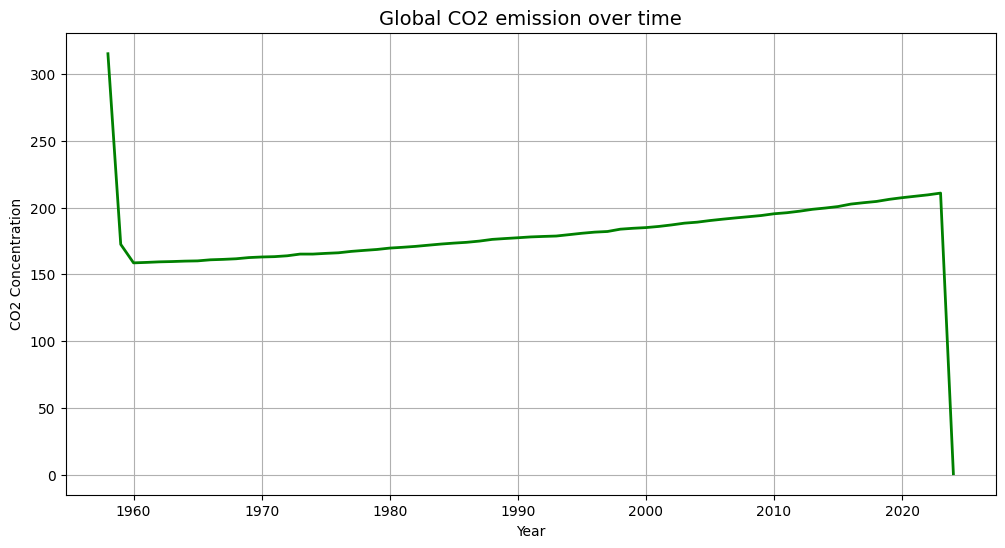

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_co2_yearly, x='Year', y = 'Avg_CO2_ppm', color='green', linewidth=2)
plt.title("Global CO2 emission over time", fontsize=14)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.grid(True)
plt.show()

The green line shows that CO₂ levels have gone up steadily from 1960 to 2023.
There was a small dip around 2020–2021, likely because of COVID-19 lockdowns, but emissions went back up afterward.

#2. Global Temperature Trend (1961–2022)

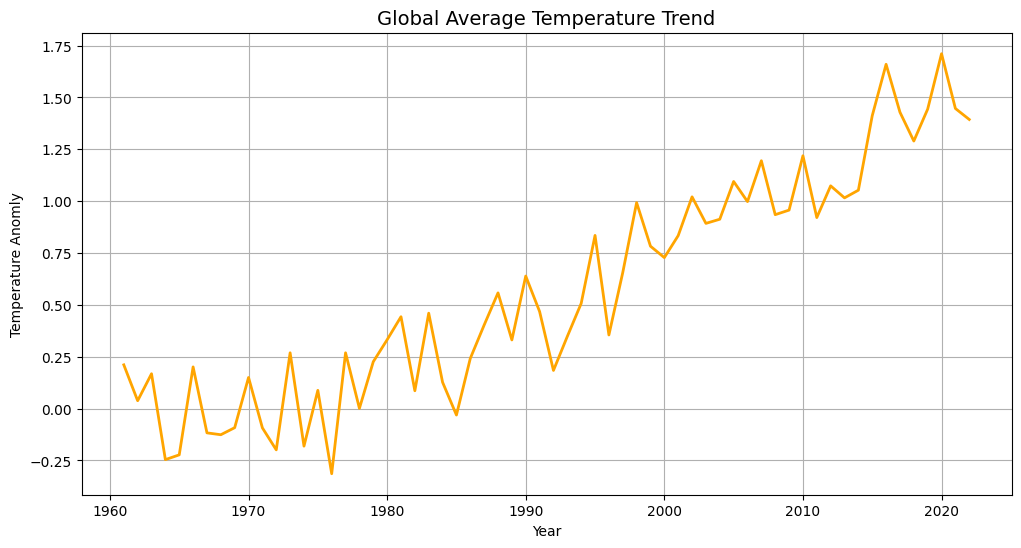

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_temp_world, x='Year', y='Temperature', color = 'orange', linewidth=2)
plt.title('Global Average Temperature Trend', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomly')
plt.grid(True)
plt.show()

The orange line shows that the Earth is getting hotter over time.
Even though there are ups and downs in some years, the overall trend is clearly rising, especially after the year 2000.

#3. Combined CO₂ and Temperature Line Plot (Dual Axis)

/tmp/ipython-input-27-1690362908.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


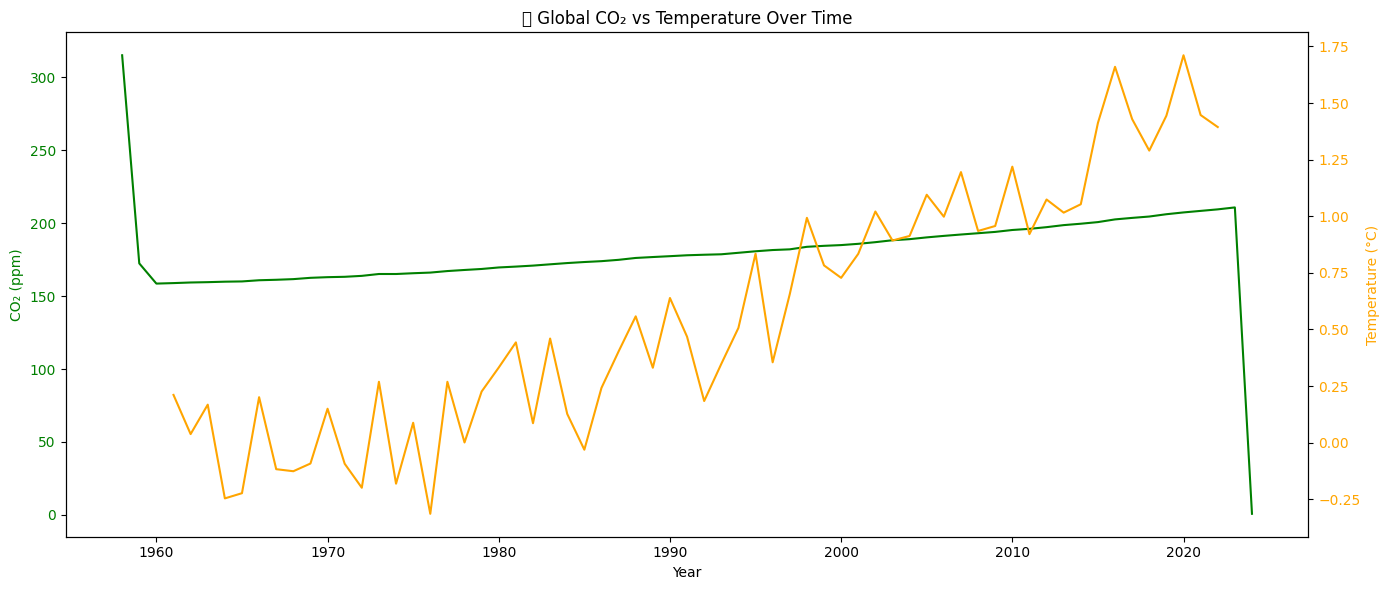

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# CO2
ax1.set_xlabel('Year')
ax1.set_ylabel('CO₂ (ppm)', color='green')
ax1.plot(df_co2_yearly['Year'], df_co2_yearly['Avg_CO2_ppm'], color='green', label='CO₂ (ppm)')
ax1.tick_params(axis='y', labelcolor='green')

# Temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='orange')
ax2.plot(df_temp_world['Year'], df_temp_world['Temperature'], color='orange', label='Temp (°C)')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('📈 Global CO₂ vs Temperature Over Time')
fig.tight_layout()
plt.show()


This combined chart shows both CO₂ and temperature rising together.
It suggests that when CO₂ increases, the temperature also increases — meaning there may be a connection between them.

# 4. Heatmap of Temperature Change by Country

/tmp/ipython-input-28-3201790925.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


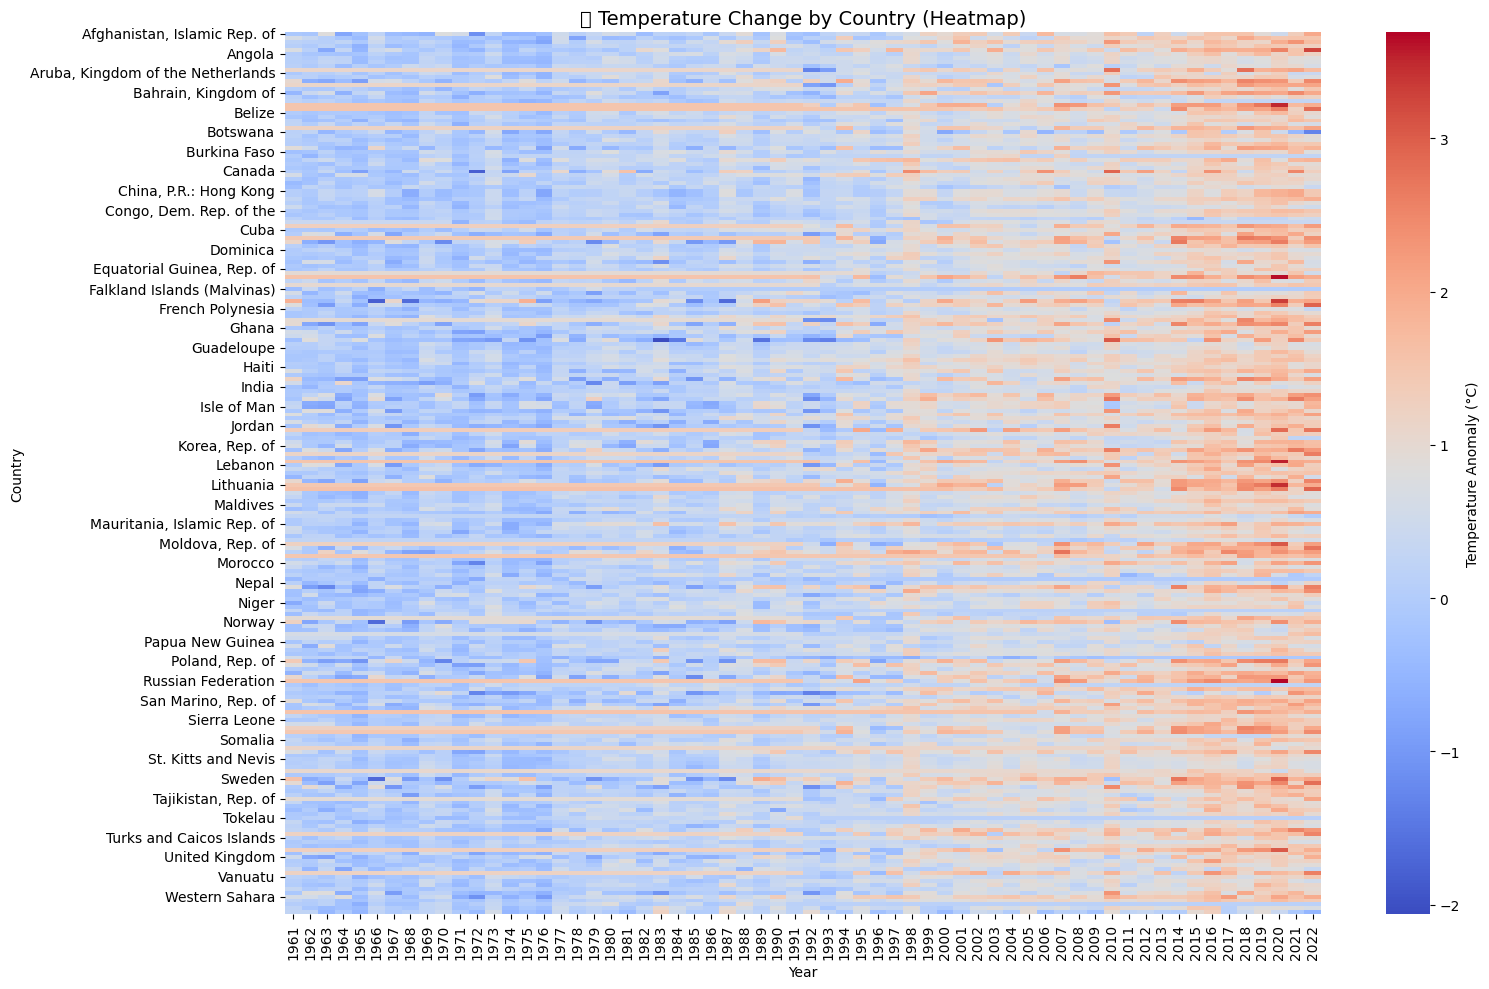

In [ ]:
# Create pivot table for heatmap
temp_heatmap = df_temp_melted.pivot_table(index='Country', columns='Year', values='Temperature')

plt.figure(figsize=(16, 10))
sns.heatmap(temp_heatmap, cmap='coolwarm', cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.title('🔥 Temperature Change by Country (Heatmap)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


This heatmap shows how temperatures have changed in different countries from 1961 to 2022.

Blue means cooler years

Red means hotter years
Most countries are turning red over time, showing that global warming is affecting many parts of the world.

#5. Top 10 Countries with Highest Temp Rise (1961 vs 2022)

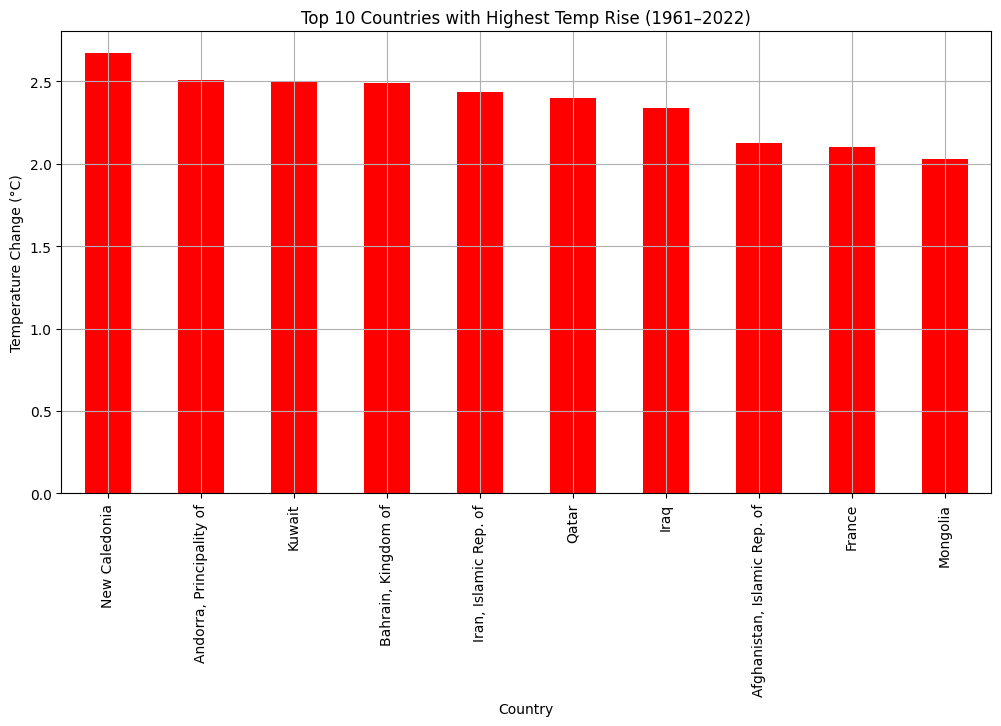

In [ ]:
# Pivot for start-end comparison
pivot_temp = df_temp_melted[df_temp_melted['Year'].isin([1961, 2022])]
pivot_diff = pivot_temp.pivot(index='Country', columns='Year', values='Temperature').dropna()
pivot_diff['Change'] = pivot_diff[2022] - pivot_diff[1961]
top10_countries = pivot_diff['Change'].sort_values(ascending=False).head(10)

top10_countries.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 10 Countries with Highest Temp Rise (1961–2022)')
plt.ylabel('Temperature Change (°C)')

plt.grid(True)
plt.show()


This heatmap shows how temperatures have changed in different countries from 1961 to 2022.

Blue means cooler years

Red means hotter years
Most countries are turning red over time, showing that global warming is affecting many parts of the world.

* CO₂ is going up, temperatures are rising, and many countries are seeing real changes.
* The data shows clear signs of global warming, and understanding this can help make better climate decisions.

#Statistical Analysis

##Is CO₂ significantly correlated with Global Temperature?

We’ll use the Pearson correlation coefficient to check the strength of the linear relationship.

In [ ]:
# Merge global temperature and CO2 by year
df_merged = pd.merge(df_temp_world[['Year', 'Temperature']], df_co2_yearly, on='Year')

In [ ]:
df_merged.isnull().sum()

,0
Year,0
Temperature,0
Avg_CO2_ppm,0


## Pearson Correlation


In [ ]:
# Pearson Correlation
corr, p_value = pearsonr(df_merged['Avg_CO2_ppm'], df_merged['Temperature'])
print(f"Pearson Correlation: {corr:.4f}, P-value: {p_value:.4e}")

Pearson Correlation: 0.9430, P-value: 2.2883e-30


Pearson correlation coefficient between global CO₂ concentration and average temperature anomaly is 0.943, with a p-value < 0.001, indicating a strong and statistically significant positive relationship between CO₂ emissions and global warming.

##Has warming accelerated after 1990?

In [ ]:
# Split temp data pre and post 1990
pre_1990 = df_temp_world[df_temp_world['Year'] < 1990]['Temperature']
post_1990 = df_temp_world[df_temp_world['Year'] >= 1990]['Temperature']

In [ ]:
# Perform t-test
t_stat, p_val = ttest_ind(post_1990, pre_1990, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

T-Statistic: 11.1855, P-value: 9.8266e-16


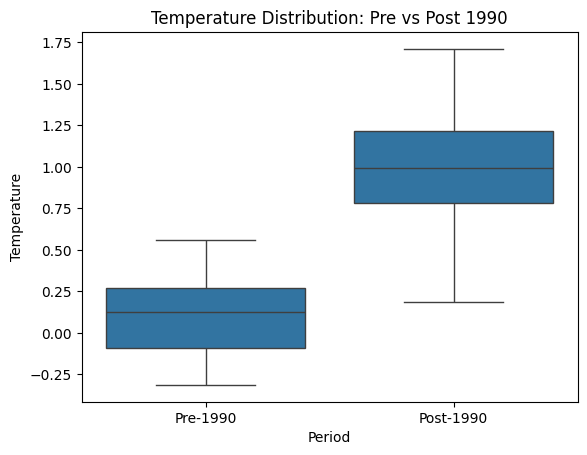

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_temp_world['Period'] = df_temp_world['Year'].apply(lambda x: 'Pre-1990' if x < 1990 else 'Post-1990')

sns.boxplot(x='Period', y='Temperature', data=df_temp_world)
plt.title('Temperature Distribution: Pre vs Post 1990')
plt.show()


A two-sample t-test was conducted to compare global temperatures before and after 1990.

- T-Statistic: 11.1855

- P-Value: 9.8266e-16

These results indicate a highly significant difference between the two periods. The extremely low p-value (much less than 0.05) strongly suggests that the observed increase in temperature after 1990 is not due to random chance, but reflects a real shift—likely due to climate change.

The boxplot visualization supports this finding, showing that:

Temperatures before 1990 were centered around 0 with low variation.

Post-1990 temperatures are consistently higher, with a clear upward shift in both the median and range.

##Linear Regression: Temperature ~ CO₂

In [ ]:
# Regression: Temperature ~ CO2
X = df_merged['Avg_CO2_ppm']
y = df_merged['Temperature']

In [ ]:
X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     482.0
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           2.29e-30
Time:                        17:07:58   Log-Likelihood:                 18.609
No. Observations:                  62   AIC:                            -33.22
Df Residuals:                      60   BIC:                            -28.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.5339      0.279    -19.834      

There is a very strong, statistically significant positive relationship between atmospheric CO₂ levels and global temperature.
The model explains nearly 89% of the variation in temperature, and the probability of this result being due to chance is practically zero (P < 0.0001).

- This linear regression model analyzes the relationship between atmospheric CO₂ levels and global temperature. The model’s R-squared value of 0.889 indicates that approximately 88.9% of the variation in global temperature can be explained by CO₂ concentration alone — reflecting a very strong relationship.

- The P-value for CO₂ is 0.000, confirming that the relationship is highly statistically significant and not due to random chance.

- The T-statistic of 21.955 for the CO₂ coefficient further supports the strong impact of CO₂ on temperature.

- Additionally, the model has a high F-statistic of 482.0, indicating that the regression as a whole is highly significant.

- The Durbin-Watson statistic is 1.937, suggesting that there is no autocorrelation in the residuals, which validates the model’s reliability.

- The AIC (-33.22) and BIC (-28.96) scores show that this model performs well compared to alternative models.

#What-If Simulation

What if CO₂ is reduced by 30% by 2050?

What if CO₂ keeps rising at current rate till 2050?

What if CO₂ rises at double the current rate?

In [ ]:
# Current last year and CO2 level from your data
last_year = df_co2_yearly['Year'].max()
last_co2 = df_co2_yearly['Avg_CO2_ppm'].iloc[-1]

# Generate years from now till 2050
future_years = np.arange(last_year + 1, 2051)

# Scenario 1: Reduce CO2 by 30% gradually
co2_reduced = np.linspace(last_co2, last_co2 * 0.7, len(future_years))

# Scenario 2: Continue current trend (linear increase)
annual_increase = df_co2_yearly['Avg_CO2_ppm'].diff().mean()
co2_continued = np.linspace(last_co2, last_co2 + annual_increase * len(future_years), len(future_years))

# Scenario 3: Double the current increase rate
co2_double = np.linspace(last_co2, last_co2 + 2 * annual_increase * len(future_years), len(future_years))

# Use regression equation: temp = -5.5339 + 0.0339 * co2
def predict_temp(co2_array):
    return -5.5339 + 0.0339 * co2_array

temp_reduced = predict_temp(co2_reduced)
temp_continued = predict_temp(co2_continued)
temp_double = predict_temp(co2_double)


In [ ]:
# Base temp from last CO₂
base_temp = -5.5339 + 0.0339 * last_co2

# Now subtract base_temp to get ΔTemp (change from today)
delta_temp_reduced = temp_reduced - base_temp
delta_temp_continued = temp_continued - base_temp
delta_temp_double = temp_double - base_temp


/tmp/ipython-input-47-4282898186.py:12: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-47-4282898186.py:12: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-47-4282898186.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-47-4282898186.py:12: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


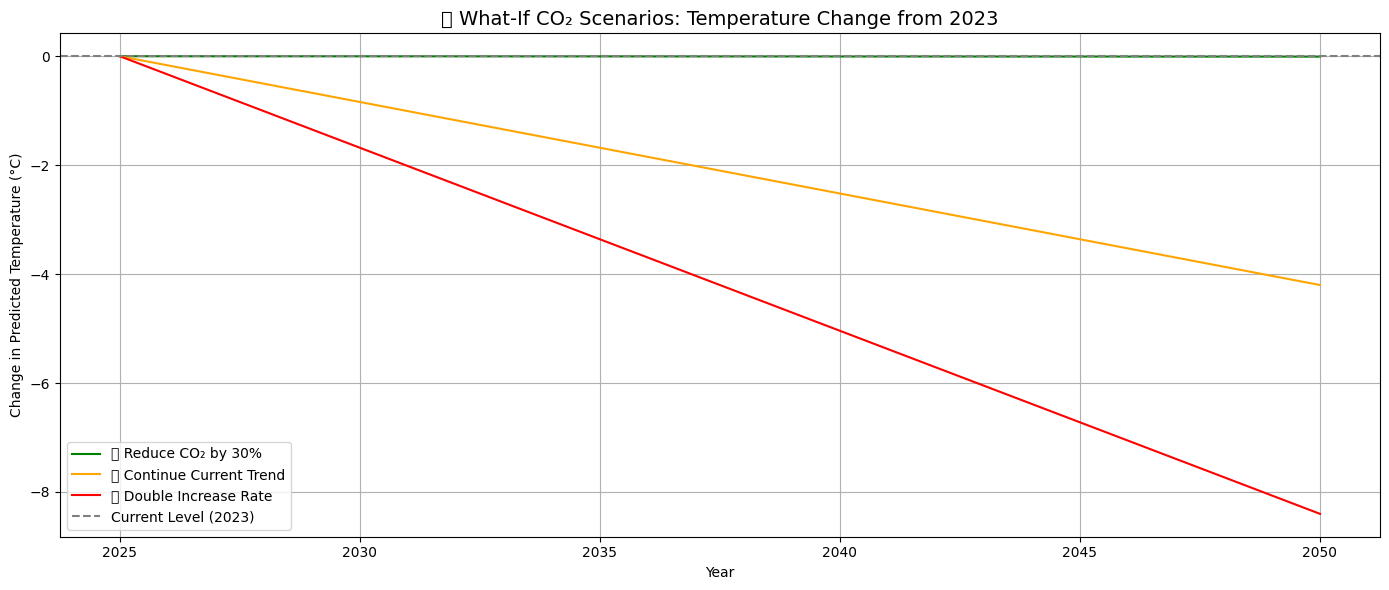

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(future_years, delta_temp_reduced, label='🌿 Reduce CO₂ by 30%', color='green')
plt.plot(future_years, delta_temp_continued, label='📈 Continue Current Trend', color='orange')
plt.plot(future_years, delta_temp_double, label='🚨 Double Increase Rate', color='red')

plt.axhline(0, color='gray', linestyle='--', label='Current Level (2023)')
plt.title("🌍 What-If CO₂ Scenarios: Temperature Change from 2023", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Change in Predicted Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- If we release more CO₂ into the air, the Earth will become hotter.
(CO₂ emissions and temperature rise go together.)

- Reducing CO₂ is the best way to keep the Earth’s temperature stable.

- If CO₂ keeps increasing quickly, the Earth could become too hot, and the damage may be permanent.



#Why This Analysis Matters

###This simulation proves that our choices today shape the climate tomorrow.
###It empowers people and policy makers to take meaningful action.